<a href="https://colab.research.google.com/github/mattswalter/Tree_Equity/blob/main/Tree_cover_change_regression_figures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Author: Matthew Walter

Email: mswalter@udel.edu

Purpose: Statistical analysis and plotting of figures analyzing the relatioship between tree cover, demographics, and urban heat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors
from google.colab import files

import seaborn as sns

from sklearn import linear_model
import statsmodels.api as sm
from scipy.stats import pearsonr


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

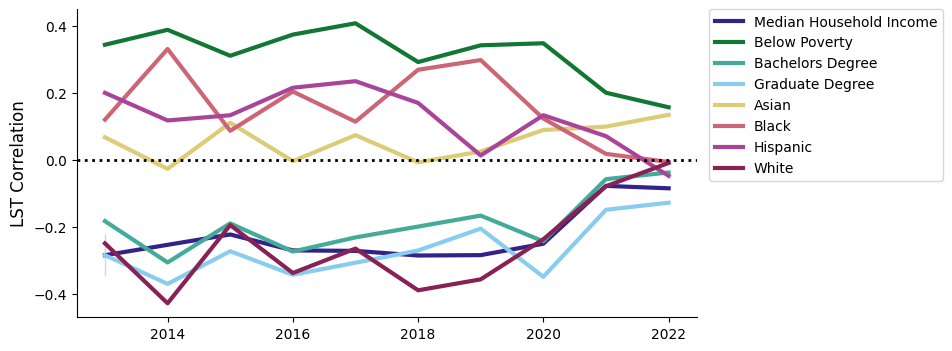

In [ ]:
# LST correlation to demographics between 2013 and 2022

l = pd.read_csv("/content/drive/My Drive/lst_corr_change.csv")

plt.figure(figsize=(8,4))
ax= sns.lineplot(x='Year', y='LST Correlation', hue='Demographic',
             data=l, palette=['#332288', '#117733','#44AA99','#88CCEE','#DDCC77','#CC6677','#AA4499','#882255'],linewidth=3)
sns.despine(bottom = False, left = False)
plt.xlabel('', fontsize=12)
plt.ylabel('LST Correlation', fontsize=12)
ax.axhline(y=0, linewidth=2, color='black', ls=':')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig("lst_corr.jpg",dpi=300,bbox_inches='tight')
files.download("lst_corr.jpg")

In [ ]:
# Regression between heat island change and tree cover change
lu = pd.read_csv("/content/drive/My Drive/phil22_all_update.csv")
lu['change_5_200'].mean()*100

lu = lu[lu['med_hou_inc'].notna()]

x = lu[['change_5_200']]
y = lu['suhi_change']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 0.16312711886343106
Coefficients: 
 [8.60772952]
                            OLS Regression Results                            
Dep. Variable:            suhi_change   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.007
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0460
Time:                        00:55:36   Log-Likelihood:                -719.04
No. Observations:                 381   AIC:                             1442.
Df Residuals:                     379   BIC:                             1450.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

In [ ]:
# Correlation coefficent significance

def r_pvalues(df):
    cols = pd.DataFrame(columns=df.columns)
    p = cols.transpose().join(cols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            p[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return p

#use custom function to calculate p-values
r_pvalues(lu)

,GEOID_12,med_hou_inc,below_pov,bach_degre,grad_degre,asian,black,hispanic,white,loss_n,gain_n,change_5_200,tt_n,suhi_2013,suhi_2022,suhi_change,tree_area_13_n,tree_area_22_n
GEOID_12,0.0,0.0466,0.1828,0.0,0.0,0.3667,0.1141,0.0002,0.6041,0.0,0.1769,0.0003,0.0,0.0,0.0,0.0,0.0,0.0
med_hou_inc,0.0466,0.0,0.0,0.0,0.0,0.0159,0.0,0.0,0.0,0.9271,0.0074,0.0015,0.0,0.0,0.1204,0.0002,0.0056,0.0002
below_pov,0.1828,0.0,0.0,0.0,0.0,0.073,0.0,0.0,0.0,0.1299,0.0011,0.0218,0.0052,0.0,0.1079,0.0,0.0,0.0
bach_degre,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9361,0.0,0.0,0.0,0.0,0.5281,0.0001,0.0885,0.0017
grad_degre,0.0,0.0,0.0,0.0,0.0,0.0014,0.0,0.0,0.0,0.1817,0.0,0.0,0.0,0.0,0.0259,0.0001,0.0,0.0
asian,0.3667,0.0159,0.073,0.0,0.0014,0.0,0.0,0.9315,0.0,0.0,0.0,0.4187,0.8515,0.3581,0.0091,0.0425,0.0,0.0002
black,0.1141,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0374,0.0352,0.0,0.0007,0.7663,0.0008,0.0459,0.4495
hispanic,0.0002,0.0,0.0,0.0,0.0,0.9315,0.0,0.0,0.0021,0.0,0.0,0.0029,0.904,0.0,0.0356,0.0,0.0,0.0
white,0.6041,0.0,0.0,0.0,0.0,0.0,0.0,0.0021,0.0,0.2504,0.0777,0.0006,0.0,0.0,0.5408,0.0,0.4066,0.0233
loss_n,0.0,0.9271,0.1299,0.9361,0.1817,0.0,0.0,0.0,0.2504,0.0,0.0,0.0,0.1043,0.0,0.0,0.6304,0.0,0.0


In [ ]:
# Correlation coefficients

lu.corr()

,GEOID_12,med_hou_inc,med_inc_q,below_pov,bach_degre,grad_degre,asian,black,hispanic,white,home_age,loss_n,gain_n,change_5_200,tt_n,suhi_2013,suhi_2022,suhi_change,tree_area_13_n,tree_area_22_n
GEOID_12,1.000000,-0.102012,-0.073189,-0.068301,-0.268631,-0.317403,-0.046375,-0.081091,0.188587,0.026649,-0.217242,0.245390,0.069241,-0.186144,-0.405867,-0.274205,-0.433222,-0.222507,0.310459,0.280570
med_hou_inc,-0.102012,1.000000,0.894508,-0.706336,0.695150,0.651126,0.123466,-0.547535,-0.269041,0.722647,-0.228726,0.004705,0.137085,0.162280,0.358443,-0.305117,-0.079712,0.191255,0.141725,0.190928
med_inc_q,-0.073189,0.894508,1.000000,-0.724254,0.654620,0.579211,0.181146,-0.571718,-0.286805,0.739720,-0.191285,0.024120,0.126484,0.127672,0.322057,-0.311124,-0.066143,0.211038,0.134708,0.182016
below_pov,-0.068301,-0.706336,-0.724254,1.000000,-0.525993,-0.461951,-0.091942,0.356088,0.400773,-0.576239,0.230949,-0.077617,-0.166374,-0.117334,-0.142650,0.356414,0.082377,-0.221876,-0.217921,-0.258537
bach_degre,-0.268631,0.695150,0.654620,-0.525993,1.000000,0.785482,0.258763,-0.484820,-0.349839,0.639919,-0.300207,-0.004113,0.240778,0.298209,0.404149,-0.259199,-0.032379,0.197013,0.087384,0.160455
grad_degre,-0.317403,0.651126,0.579211,-0.461951,0.785482,1.000000,0.163545,-0.403133,-0.321215,0.554806,-0.197204,0.068479,0.358503,0.361747,0.374250,-0.367918,-0.113960,0.196113,0.220647,0.287203
asian,-0.046375,0.123466,0.181146,-0.091942,0.258763,0.163545,1.000000,-0.454749,-0.004418,0.228985,-0.287861,-0.295206,-0.233148,0.041552,0.009622,0.047207,0.133422,0.103985,-0.235243,-0.192269
black,-0.081091,-0.547535,-0.571718,0.356088,-0.484820,-0.403133,-0.454749,1.000000,-0.279500,-0.860990,0.248304,0.215515,0.106679,-0.107953,-0.263155,0.173043,-0.015280,-0.171899,0.102493,0.038904
hispanic,0.188587,-0.269041,-0.286805,0.400773,-0.349839,-0.321215,-0.004418,-0.279500,1.000000,-0.157174,0.148396,-0.225732,-0.329040,-0.152419,0.006202,0.258046,-0.107681,-0.357379,-0.215014,-0.238249
white,0.026649,0.722647,0.739720,-0.576239,0.639919,0.554806,0.228985,-0.860990,-0.157174,1.000000,-0.280672,-0.059029,0.090500,0.175835,0.283655,-0.323432,0.031429,0.330330,0.042690,0.116333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

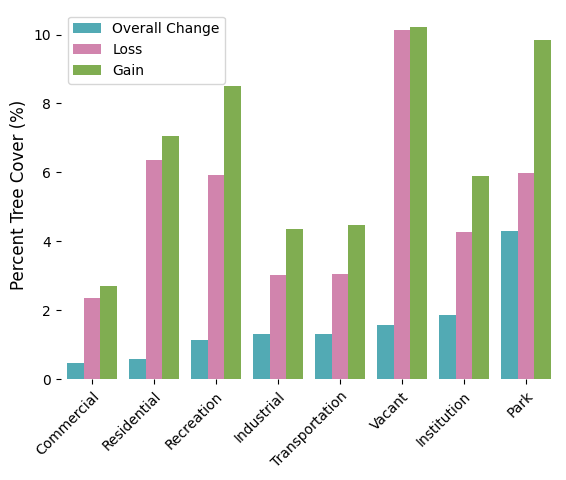

In [ ]:
# Plot of tree gain, loss, and change by land use

lu = pd.read_csv("/content/drive/My Drive/lulc_tree_change.csv")

colors = ["#41B7C5", "#DE77AE","#80BC42"]
sns.set_palette(sns.color_palette(colors))
lu = lu.sort_values(['val'])

lu['val'] = lu['val'] * 100
g = sns.barplot(x="lulc_name",
           y="val",
           hue="type",
           data=lu)
plt.xticks(rotation=45,ha='right', rotation_mode='anchor')
sns.despine(bottom = True, left = True)
plt.xlabel('', fontsize=12)
plt.ylabel('Percent Tree Cover (%)', fontsize=12)
g.legend_.set_title(None)

plt.savefig("phil_tree_lulc.jpg",dpi=300,bbox_inches='tight')
files.download("phil_tree_lulc.jpg")

In [4]:
# Read in data
g = pd.read_csv("/content/drive/My Drive/phil_2022_all_data.csv")

In [ ]:
# Regression between 2022 heat island and tree cover
x = g[['tree_area_2022_h5_200_n']]
x = x *100
y = g['suhi_2022']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 9.058792134396356
Coefficients: 
 [-0.09297247]
                            OLS Regression Results                            
Dep. Variable:              suhi_2022   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     216.6
Date:                Thu, 25 Apr 2024   Prob (F-statistic):           1.36e-39
Time:                        03:20:39   Log-Likelihood:                -731.13
No. Observations:                 408   AIC:                             1466.
Df Residuals:                     406   BIC:                             1474.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

In [5]:
# Regression between 2013 heat island and tree cover
x = g[['tree_area_2013_h5_200_n']]
x = x *100
y = g['suhi_2013']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x)

print_model = model.summary()
print(print_model)

Intercept: 
 8.630033237555455
Coefficients: 
 [-0.08824342]
                            OLS Regression Results                            
Dep. Variable:              suhi_2013   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     272.9
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           2.90e-47
Time:                        22:59:39   Log-Likelihood:                -647.27
No. Observations:                 408   AIC:                             1299.
Df Residuals:                     406   BIC:                             1307.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------